Importação das bibliotecas

In [68]:
from time import time
import numpy as np
import warnings
import matplotlib.pyplot as plt
from randomness import generate_column_vector, generate_invertible_matrix, generate_strictly_diagonal_dominant_matrix
from utils import is_strictly_diagonal_dominant

# Projeto 1
Implementação dos algoritmos de eliminação gaussiana aprendidos (Jacob e Gauss)

## Questões
### 1ª Questão
#### a ) Implemente os métodos de Jacobi e Gauss-Seidel para resolver o sistema linear $ Ax = b $

Implementando o método de Jacobi:

In [69]:
def jacobi(A: np.ndarray, b: np.ndarray, solution: np.ndarray = None, n: int = 100, atol: float = 1e-6) -> tuple[int, np.ndarray]:
    """This function uses the Jacobi method for computing the solution of the linear system Ax = b.
    Remembering that, if the matrix isn't strictly diagonal, the algorithm may not converge to the solution.
    And the algorithm converges if, and only if, all eigenvalues of A are less then 1 (This function doesn't
    calculate the eigenvalues because it can cost a lot of resources of the computer).

    Args:
        A (np.ndarray): Squared nxn matrix A
        b (np.ndarray): Vector b
        n (int, optional): The amout of times the initial guess will be iterated to converge to the solution. Default to 100
        atol (float, optional): Define the tolerance of the approximation between the algorithm solution and the real solution (if the solution is passed)
        solution (np.ndarray, optional): The result of the system

    Raises:
        ValueError: Raises if A has 0 in its diagonal
        
    Returns:
        tuple[int, np.ndarray]: Returns how many iterations did it take to get the algorithms sollution and the approximation to the solution of the system
    """
    x = np.zeros(shape=(A.shape[1], 1))

    # If the matrix has zeros on its diagonal, it will change the order of lines to make the future
    # D matrix invertible
    A_diag = np.diag(A)
    if 0 in A_diag:
        raise ValueError("A has 0s in its diagonal!")

    # If the matrix isn't strictly diagonal dominant, so the method may diverge, so it will warn the user
    if not is_strictly_diagonal_dominant(A):  # Checking if the method will converge
        warnings.warn("The matrix passed isn't strictly diagonal dominant, so the Jacobi method may converge")
    
    # Constructing the matrices L, U and D where A = L + D + U
    D = np.diag(np.diag(A))
    U = np.zeros(shape=A.shape)
    L = np.zeros(shape=A.shape)
    for j in range(A.shape[1]):  # I'm going throughout all the columns of A
        U += np.diag(np.diag(A, j+1), j+1)
        L += np.diag(np.diag(A, -(j+1)), -(j+1))
    
    # Creating the M matrix and c vector (M = -D/(L+U), c = D/b)
    inverse_of_D = np.linalg.inv(D)
    M = -inverse_of_D@(L+U)
    c = inverse_of_D@b
    
    # Initializing the algorithm
    for k in range(n):
        x = M @ x + c
        
        if isinstance(solution, np.ndarray):  # If a solution was given
            if (np.isclose(x, solution, atol=atol)).all():  # Check if it iss already next to the solution
                return k, x  # If it is, returns how many iterations did it took and the algorithm's solution
    
    return k, x


Implementando o método de Gauss:

In [ ]:
def gauss_seidel(A: np.ndarray, b: np.ndarray, solution: np.ndarray = None, n: int = 100, atol: float = 1e-6) -> tuple[int, np.ndarray]:
    """This function uses the Gauss Seidel method for computing the solution of the linear system Ax = b.
    Remembering that, if the matrix isn't strictly diagonal, the algorithm may not converge to the solution.
    And the algorithm converges if, and only if, all eigenvalues of A are less then 1 (This function doesn't
    calculate the eigenvalues because it can cost a lot of resources of the computer)

    Args:
        A (np.ndarray): Squared nxn matrix A
        b (np.ndarray): Vector b
        n (int, optional): The amout of times the initial guess will be iterated to converge to the solution. Default to 100
        atol (float, optional): Define the tolerance of the approximation between the algorithm solution and the real solution (if the solution is passed)
        solution (np.ndarray, optional): The result of the system

    Raises:
        ValueError: Raises if A has 0 in its diagonal
        
    Returns:
        tuple[int, np.ndarray]: Returns how many iterations did it take to get the algorithms sollution and the approximation to the solution of the system
    """
    x = np.zeros(shape=(A.shape[1], 1))

    # If the matrix has zeros on its diagonal, it will change the order of lines to make the future
    # D matrix invertible
    A_diag = np.diag(A)
    if 0 in A_diag:
        raise ValueError("A has 0s in its diagonal!")

    # If the matrix isn't strictly diagonal dominant, so the method may diverge, so it will warn the user
    if not is_strictly_diagonal_dominant(A):  # Checking if the method will converge
        warnings.warn("The matrix passed isn't strictly diagonal dominant, so the Jacobi method may converge")
    
    # Constructing the matrices L, U and D where A = L + D + U
    D = np.diag(np.diag(A))
    U = np.zeros(shape=A.shape)
    L = np.zeros(shape=A.shape)
    for j in range(A.shape[1]):  # I'm going throughout all the columns of A
        U += np.diag(np.diag(A, j+1), j+1)
        L += np.diag(np.diag(A, -(j+1)), -(j+1))
    
    # Creating the M matrix
    G = np.linalg.inv(D + L)
    M = -G @ U
    d = G @ b

    for k in range(n):
        x = M @ x + d

        if isinstance(solution, np.ndarray):  # If a solution was given
            if (np.isclose(x, solution, atol=atol)).all():  # Check if it iss already next to the solution
                return k, x  # If it is, returns how many iterations did it took and the algorithm's solution
    
    return k, x


#### b) Teste com matrizes $ 2 × 2 $ e $ 3 × 3 $, e compare graficamente a velocidade de convergência dos dois métodos

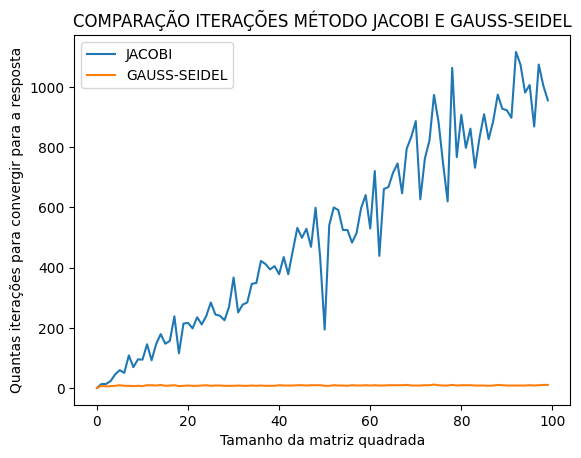

In [78]:
SAMPLES = 100
TOTAL_ITERATIONS_FOR_EACH_ALGORITHM = 5000
ABSOLUTE_TOLERANCE = 1e-10

# Generating the matrices that will be used (List where i = 0 have the i+1 x i+1 matrix)
matrices = [ generate_strictly_diagonal_dominant_matrix(k+1) for k in range(SAMPLES) ]
vectors = [ generate_column_vector(k+1) for k in range(SAMPLES) ]

jacobi_time_for_each_matrix = []
gauss_time_for_each_matrix = []

for i in range(SAMPLES):
    solution = np.linalg.inv(matrices[i]) @ vectors[i]  # Calculating the solution

    iterations_jacobi, _ = jacobi(
        matrices[i],
        vectors[i],
        solution,
        TOTAL_ITERATIONS_FOR_EACH_ALGORITHM,
        ABSOLUTE_TOLERANCE
    )  # Testing the JACOBI method
    jacobi_time_for_each_matrix.append(iterations_jacobi)  # Adding the iterations count

    iterations_gauss, _ = gauss_seidel(
        matrices[i],
        vectors[i],
        solution,
        TOTAL_ITERATIONS_FOR_EACH_ALGORITHM,
        ABSOLUTE_TOLERANCE
    )  # Testing the GAUSS SEIDEL method
    gauss_time_for_each_matrix.append(iterations_gauss)  # Adding the iterations count


plt.title("COMPARAÇÃO ITERAÇÕES MÉTODO JACOBI E GAUSS-SEIDEL")
x_axis = [x for x in range(SAMPLES)]

plt.plot(x_axis, jacobi_time_for_each_matrix, label="JACOBI")
plt.plot(x_axis, gauss_time_for_each_matrix, label="GAUSS-SEIDEL")

plt.ylabel('Quantas iterações para convergir para a resposta')
plt.xlabel('Tamanho da matriz quadrada')

plt.legend()
plt.show()
